# Final Project- Fraud Detection

![Image Alt Text](https://th.bing.com/th/id/R.ed0fa244220573384bd7b756d25ae924?rik=FRtx954FQJCsEQ&pid=ImgRaw&r=0)


<u><b>Introduction: </u></b> <br>
The objective of this project is to compare the performance of deep learning models  on existing challenging dataset.<br> The project aims to determine which model performs the best based on several evaluation metrics by comparison to other related work in the literature


NOTE:Our data is binary classification because the goal of the project is to determine whether a credit card transaction is fraudulent (Class 1) or not (Class 0).

# Step 1: Explore the Dataset

 Import necessary libraries

In [99]:
import pandas as pd  # Import Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import Matplotlib for basic data visualization
import seaborn as sns  # Import Seaborn for enhanced data visualization
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Standardize feature values for better model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Import metrics for model evaluation
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier for classification tasks
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron classifier for classification tasks
from tensorflow.keras.models import Sequential  # Import Sequential model for building neural networks
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout  # Import layers for building neural network architectures
from tensorflow.keras import regularizers, optimizers  # Import regularizers and optimizers for neural network configuration
from sklearn.metrics import confusion_matrix, classification_report  # Import metrics for model evaluation in classification
from tensorflow.keras.callbacks import EarlyStopping  # Early stopping callback for preventing overfitting
import numpy as np  # Import NumPy for numerical operations
import warnings  # Import Warnings to manage or ignore warning messages in the code
warnings.filterwarnings('ignore')  # Ignore warning messages during code execution
# Set the option to display all columns when printing DataFrames
pd.set_option("display.max_columns", None)  # Display all columns when printing DataFrames


 Load the dataset

In [100]:
df = pd.read_csv('creditcard.csv')
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

Note:The dataset contains 284,807 entries with 31 columns. Each column represents different features related to credit card transactions. The last column, 'Class', is of type int64 and represents whether a transaction is fraudulent (1) or not (0). The data types for other columns are float64. The total memory usage of the dataset is 67.4 MB.



 Display the first few rows of the dataset

In [101]:
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Note:The displayed table shows the values of different features for the initial transactions in the dataset. Each row represents a transaction, and the columns provide information such as time, various V features, amount, and the class (0 for non-fraudulent, 1 for fraudulent). This snapshot helps in understanding the structure and content of the dataset at the beginning.

 Display summary statistics of numerical features

In [102]:
print("\nSummary Statistics:")
df.describe()



Summary Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


 Visualize the distribution of the target variable (Class)

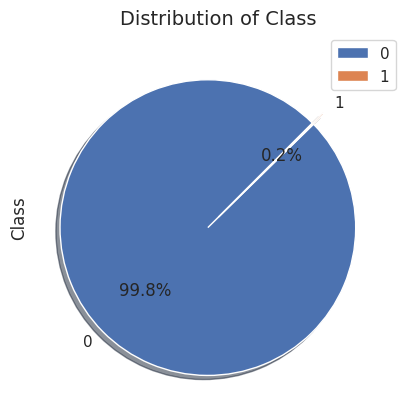

In [103]:
df['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()

Note: the chart conveys that the majority of the data points belong to class 0 (non-fraudulent transactions), with a small percentage representing class 1 (fraudulent transactions).

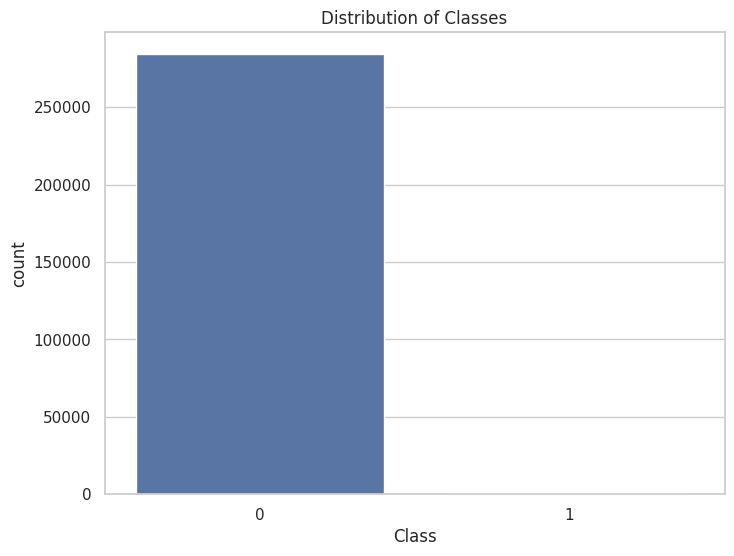

In [104]:
def plot_value_counts(df, column):
    # Set the style of the plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Class', data=df)
    plt.title('Distribution of Classes')

    plt.show()
# Assuming 'df' is your DataFrame
plot_value_counts(df, "Class")

Note : According to what we can see, our data is unbalanced as 0(no fraud) has count 250000 and 1 has 492

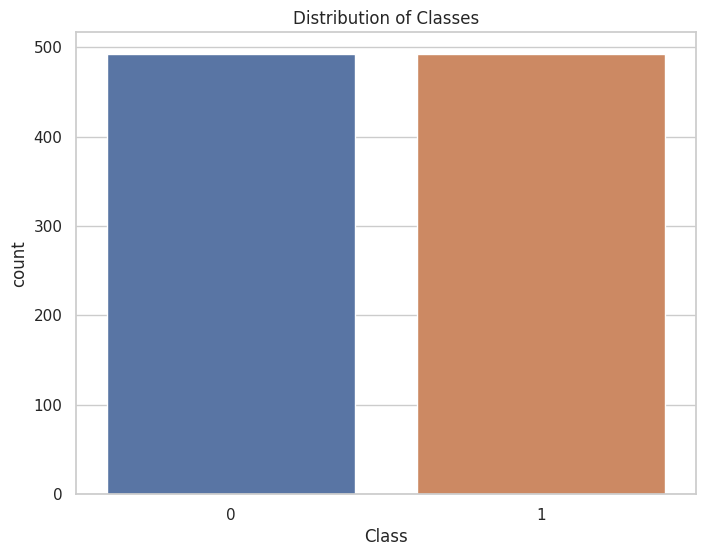

In [105]:
# Selecting 1000 samples of Class 0 using random sampling
class_0_samples = df[df["Class"] == 0].sample(n=1000, random_state=42)

# Calculating quartiles and interquartile range (IQR) for Class 0 samples
Q1 = class_0_samples.quantile(0.25)
Q3 = class_0_samples.quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers from Class 0 samples based on IQR method
class_0_samples = class_0_samples[
    ~((class_0_samples < (Q1 - 1.43 * IQR)) | (class_0_samples > (Q3 + 1.5 * IQR))).any(
        axis=1
    )
]

# Selecting all samples of Class 1
class_1_samples = df[df["Class"] == 1]

# Concatenating the resampled Class 0 samples and all Class 1 samples
df_resampled = pd.concat([class_0_samples, class_1_samples])

# Plotting the value counts of the "Class" column in the resampled DataFrame
plot_value_counts(df_resampled, "Class")

This function uses Seaborn to create histograms and kernel density estimates for the specified features, distinguishing between "Not Fraud" and "Fraud" classes. The resulting plots are displayed in a grid layout with specified columns per row.

 Visualize the correlation matrix

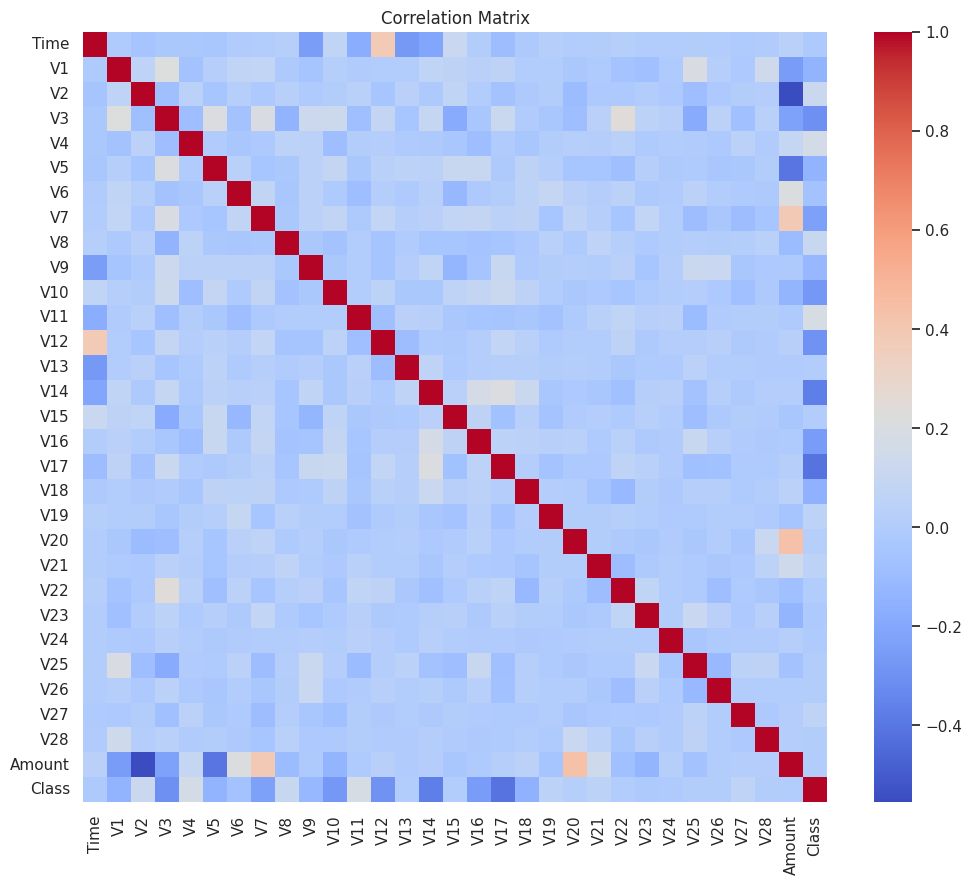

In [ ]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix visually represents the pairwise correlation between different features in the dataset. In this heatmap, each cell color indicates the strength and direction of the correlation: warmer colors (shades of red) denote positive correlations, while cooler colors (shades of blue) represent negative correlations.

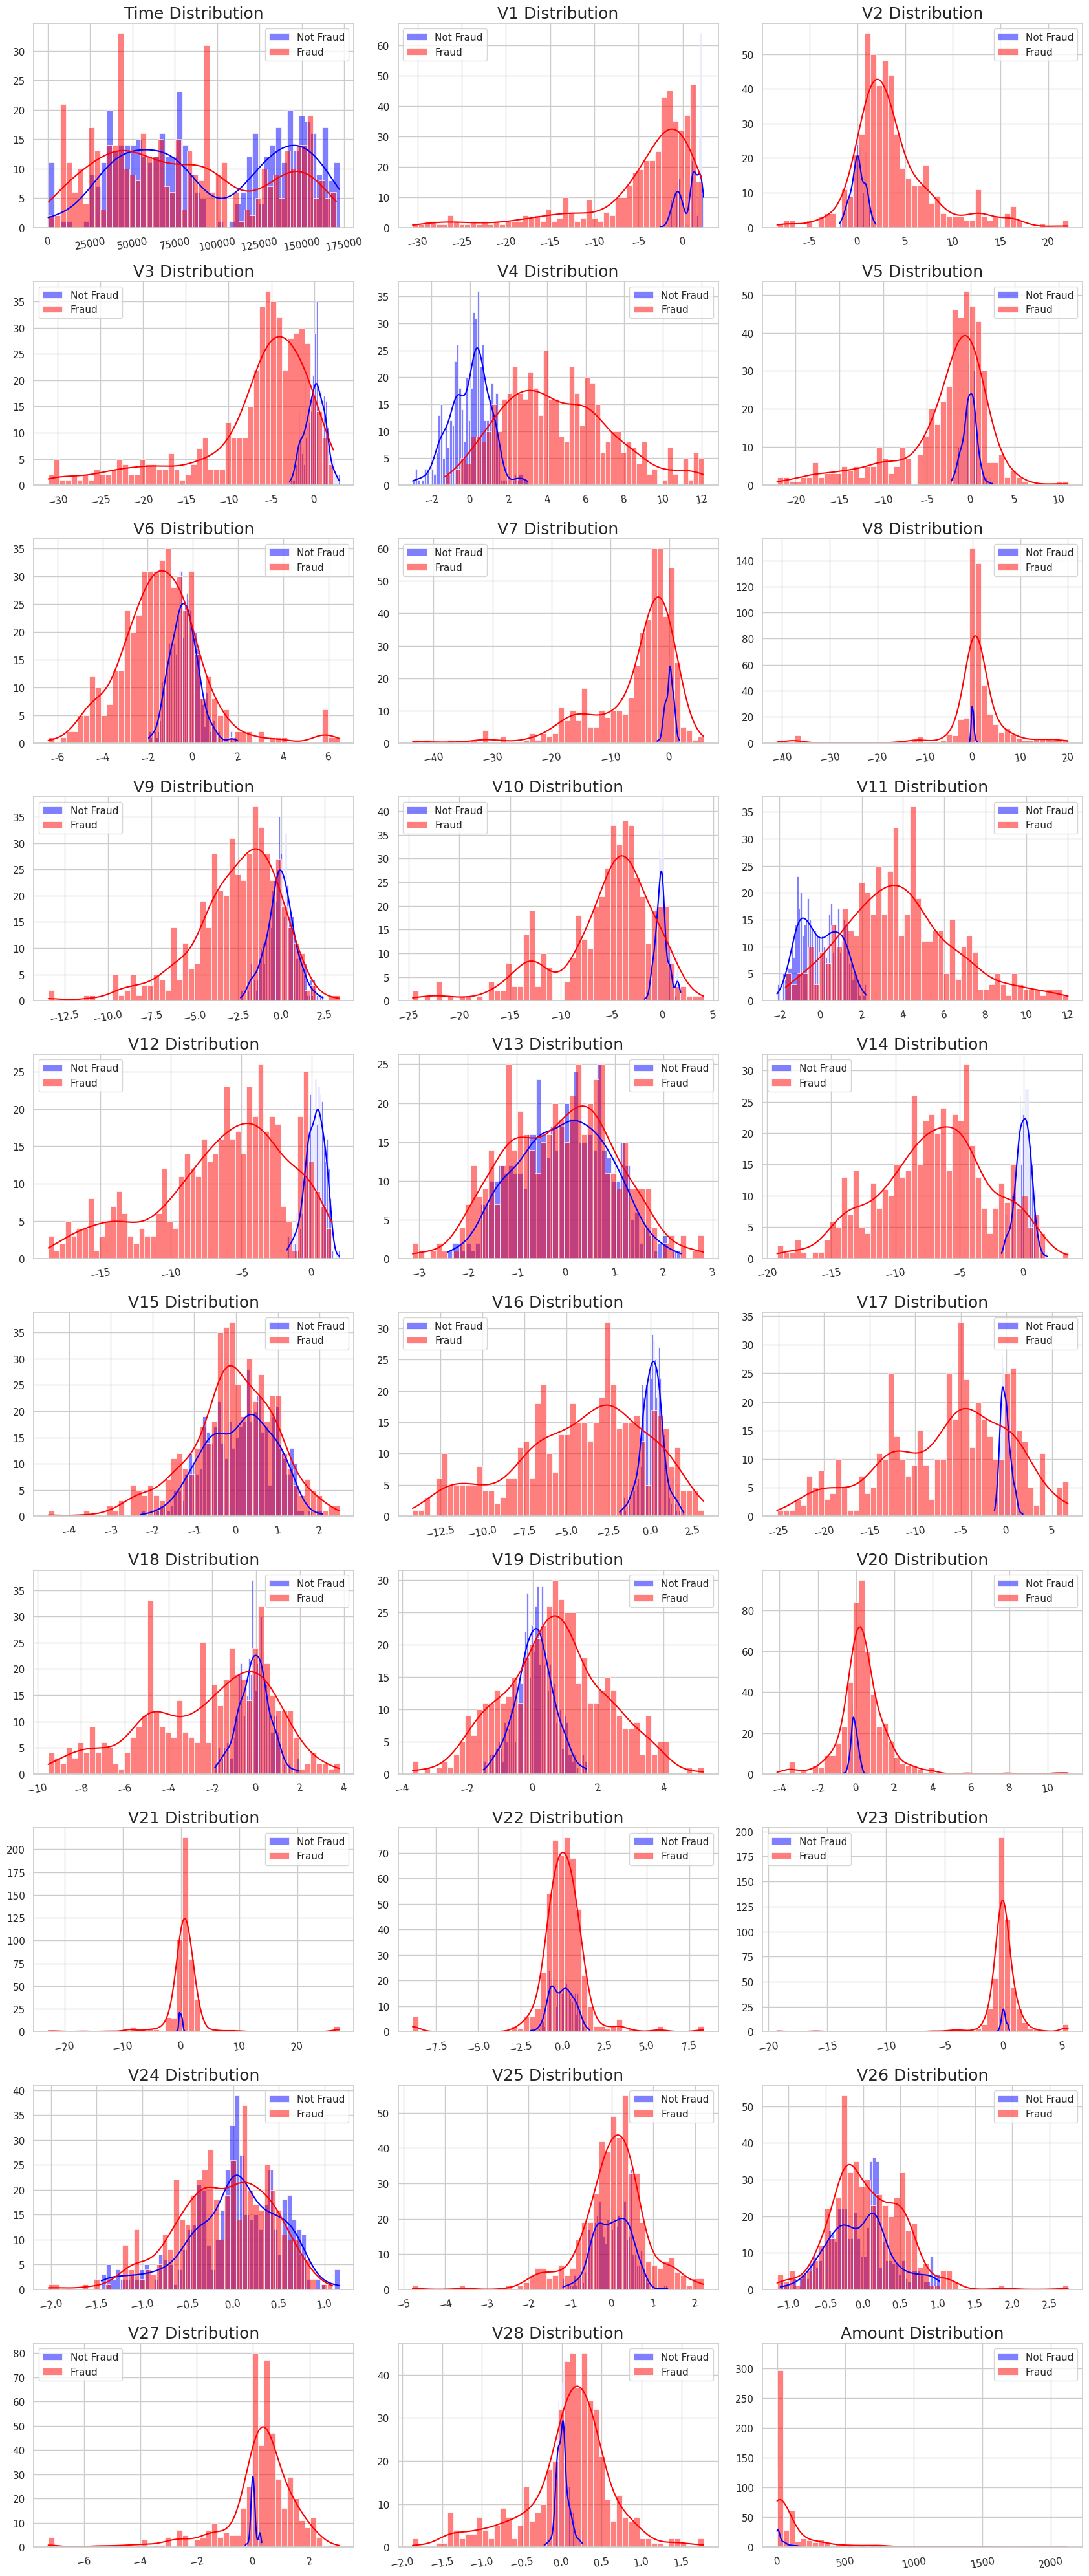

In [106]:
# Creating a function to plot the distribution of features based on the target variable "Class"

columns_features = [column for column in df_resampled.columns if column != "Class"]


def plot_distribution(df, columns, n_cols, hue):
    # Calculating the number of rows required based on the number of columns and specified number of columns per row
    n_rows = (len(columns) - 1) // n_cols + 1

    # Creating subplots with a specified number of rows and columns
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(17, 4 * n_rows))
    ax = ax.flatten()

    # Looping through each feature column and plotting the distribution for "Not Fraud" and "Fraud" classes
    for i, column in enumerate(columns):
        sns.histplot(
            df[column][df["Class"] == 0],
            bins=50,
            color="blue",
            label="Not Fraud",
            kde=True,
            ax=ax[i],
        )
        sns.histplot(
            df[column][df["Class"] == 1],
            bins=50,
            color="red",
            label="Fraud",
            kde=True,
            ax=ax[i],
        )

        # Setting titles, labels, and tick parameters for each subplot
        ax[i].set_title(f"{column} Distribution", fontsize=18)
        ax[i].set_xlabel(None, fontsize=16)
        ax[i].set_ylabel(None, fontsize=16)
        ax[i].tick_params(axis="x", rotation=10)
        ax[i].legend()

    # Ensuring consistent y-axis scaling for all subplots
    ylim_top = ax[i].get_ylim()[1]
    ax[i].set_ylim(top=ylim_top * 1.1)

    # Removing empty subplots if there are fewer features than the total number of subplots
    for i in range(len(columns), len(ax)):
        ax[i].axis("off")

    # Adjusting layout for better appearance
    plt.tight_layout()

    # Displaying the plot
    plt.show()


# Example usage
plot_distribution(df_resampled, columns_features, 3, "Class")

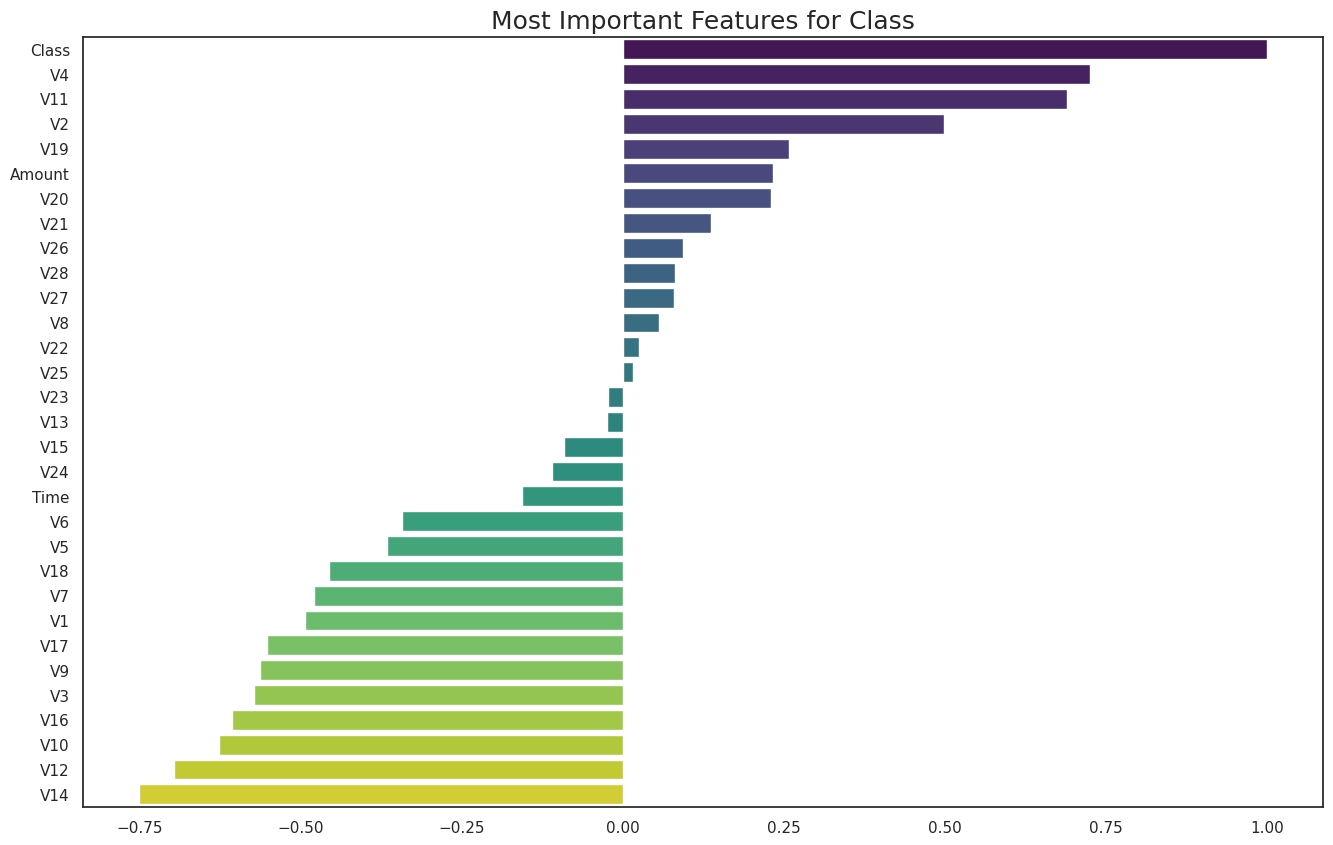

In [ ]:
# Set the style for the plot
sns.set(style="white")
plt.figure(figsize=(16, 10))

# Calculate correlation matrix
corr_matrix = df_resampled.corr()

# Choose your target variable (assuming 'target_variable' is your target variable)
target_variable = "Class"

# Extract correlations with the target variable
correlations = corr_matrix[target_variable].sort_values(ascending=False)

# Create a bar plot for the most important features
sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")

# Set plot title
plt.title(f"Most Important Features for {target_variable}", fontsize=18)

# Display the plot
plt.show()

Note:This bar plot visualizes the correlation of each feature with the target variable "Class," providing insights into the importance of individual features in relation to the target variable. The plot is based on the correlation values, with positive values indicating a positive correlation and negative values indicating a negative correlation.

# Step 2: Preprocess the Data

1-Handle missing data

In [ ]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Note:there are missing values in columns 'V21' to 'Class' and 'Amount'. The count for each column indicates the number of missing values in that particular column. Addressing missing values is crucial for ensuring the integrity and reliability of the dataset before performing any analysis or modeling.

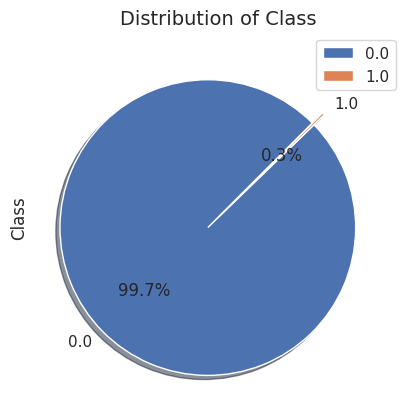

In [13]:
# # Distribution of Class (After Handling Missing Values)
# After addressing missing values, a new pie chart is created to visualize the updated distribution of the 'Class' column.
df['Class'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =45)
plt.title('Distribution of Class',size=14)
plt.show()

In [14]:
print(df.dropna(inplace=True))

None


Note:rows with missing values have been removed, and the DataFrame has been updated accordingly.

2-Separate features and target variable

In [15]:
X = df.drop('Class', axis=1)
y = df['Class']

In [16]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39696,39927,1.337601,-0.461112,0.028591,-0.776905,-0.672695,-0.717798,-0.335979,-0.012054,-1.194602,0.813973,1.705522,-0.445933,-1.460959,0.627234,0.142396,0.758761,0.579691,-1.752785,0.658632,-0.057170,-0.068754,-0.395057,0.132148,0.179741,0.273213,-0.446899,-0.018915,-0.004059,11.98
39697,39927,-1.466679,2.425732,0.877724,3.950765,0.762477,1.162748,0.575625,-0.288354,-1.357990,2.907686,-0.890614,-0.462249,1.291626,-0.392713,1.434131,-0.347514,-0.124999,-0.270457,0.875010,0.129962,0.186051,0.571010,-0.107517,-0.754306,-0.752828,0.113179,-2.079421,-0.809173,1.50
39698,39927,-0.523165,-0.100021,0.892966,-1.900405,-0.156870,-0.783894,0.917683,-0.308345,-1.305284,0.514227,0.675557,-1.629259,-2.491738,0.386368,-0.595120,1.352518,-0.228732,-0.936432,0.660506,-0.071640,-0.082504,-0.414677,-0.063392,-0.087455,-0.303383,-0.682889,-0.178417,-0.137169,100.92
39699,39928,-2.768425,-1.007072,2.151127,0.117797,1.283178,1.869731,-0.562240,0.820374,0.348797,-0.122472,1.700394,1.375019,0.623614,-0.610102,0.577459,-0.941449,0.571209,-1.502828,-0.785017,-0.491556,-0.182963,0.778210,0.904077,-1.288631,0.212441,0.483975,-0.027614,-0.582813,11.99


Note:The feature variable X now contains the dataset excluding the 'Class' column, and the target variable y contains only the 'Class' column. These variables are typically used as inputs for training machine learning models, where X represents the input features, and y represents the target variable to be predicted.

In [17]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39696    0.0
39697    0.0
39698    0.0
39699    0.0
39700    0.0
Name: Class, Length: 39701, dtype: float64

Note: This target variable is typically used for training and evaluating machine learning models.

3- Split the data into training and testing sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4- Apply StandardScaler for feature scaling

In [19]:
# Standerdize = for better performance and faster
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Choose Deep Learning Models

# Keras Model (simple neural network)

In [20]:
# Define a simple deep learning model using Keras (Simple Neural Network)
model_keras = Sequential()
model_keras.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_keras.add(Dense(32, activation='relu'))
model_keras.add(Dense(1, activation='sigmoid'))

# Compile the Keras model
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define an MLPClassifier (Multilayer Perceptron)
model_mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)


Note:Model Definition

Three classification models are defined for comparison:</br>

 1. Simple Neural Network using Keras (Sequential Model)</br>

A neural network with two hidden layers is defined using Keras Sequential API:</br>
- Input layer with 64 neurons and ReLU activation function.</br>
- Hidden layer with 32 neurons and ReLU activation function.</br>
- Output layer with 1 neuron and Sigmoid activation function for binary classification.</br>
Binary crossentropy is a common choice for binary classification problems. It measures the dissimilarity between the true class labels and the predicted probabilities.</br>
For each instance, it penalizes the model more for predicting a probability that is far from the actual class (0 or 1).</br>

A Random Forest classifier is defined with 100 trees and a random state for reproducibility.</br>

An MLP classifier with two hidden layers is defined:</br>

Hidden layer with 64 neurons.</br>
Hidden layer with 32 neurons.</br>

Adam Optimizer:</br>

Adam is an adaptive optimization algorithm that adjusts the learning rates of each parameter individually based on past gradients.</br>
It combines the benefits of two other popular optimizers: RMSprop and momentum. Adam is known for its efficiency in training neural networks and is widely used in practice.


# Fully Connected Model

In [21]:
def build_fully_connected_model(input_dim, output_dim, hidden_units=(128, 64), activation='relu', dropout_rate=0.3, l2_reg=0.001):
    model = Sequential()
    model.add(Dense(hidden_units[0], input_dim=input_dim, activation=activation, kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(hidden_units[1], activation=activation, kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_dim, activation='sigmoid'))  # Output layer for binary classification

    return model

Note:This function builds a fully connected neural network model for binary classification using the Keras Sequential API. It allows customization of the model architecture, activation functions, dropout rates for regularization, and L2 regularization.

The model consists of two hidden layers with the specified number of neurons, each followed by dropout layers for regularization. The output layer uses the sigmoid activation function, suitable for binary classification tasks.
This function provides a convenient way to create neural network models for binary classification tasks with adjustable architecture and regularization.


# FeedForward Neural Network

In [121]:
# Build the FNN model with potential improvements
model_fnn = Sequential()
model_fnn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_fnn.add(Dense(64, activation='leaky_relu'))  # Experiment with LeakyReLU
model_fnn.add(Dropout(0.2))  # Regularization with dropout
model_fnn.add(Dense(1, activation='sigmoid'))

Note:The code defines an improved Feedforward Neural Network (FNN) model using the Keras Sequential API. The model incorporates potential improvements in terms of activation functions and regularization.

Input Layer:

Dense layer with 128 neurons and ReLU activation function. It takes input data with dimensions determined by X_train.shape[1].
Hidden Layer:

Dense layer with 64 neurons and Leaky ReLU activation function. Leaky ReLU is used as an experiment to introduce a small negative slope for negative input values.
Dropout Layer:

Dropout layer with a dropout rate of 0.2. Dropout is applied for regularization, randomly setting a fraction of input units to zero during training to prevent overfitting.
Output Layer:

Dense layer with 1 neuron and sigmoid activation function. This is suitable for binary classification tasks, providing output probabilities between 0 and 1.

# Convolutional Neural Network

In [23]:
# CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model_cnn = Sequential()
model_cnn.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))


Note:The code defines a Convolutional Neural Network (CNN) model using the Keras Sequential API for one-dimensional data (e.g., time series). The architecture consists of the following layers:

Convolutional Layer:

Conv1D layer with 32 filters, a kernel size of 3, ReLU activation function, and input shape determined by X_train.shape[1] and 1 channel. This layer captures local patterns in the input sequence.
Max Pooling Layer:

MaxPooling1D layer with a pool size of 2. It reduces the spatial dimensions of the output from the convolutional layer.
Flatten Layer:

Flatten layer to convert the 2D output from the convolution and pooling layers into a 1D array.
Dense Layer (Hidden):

Dense layer with 64 neurons and ReLU activation function. It captures higher-level features from the flattened representation.
Dense Layer (Output):

Dense layer with 1 neuron and sigmoid activation function. This is suitable for binary classification tasks, providing output probabilities between 0 and 1.

# LSTM Neural Network (Long Short-Term Memory (type of RNN))

In [24]:
# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(X_train.shape[1], 1), activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

Note:The code defines a Long Short-Term Memory (LSTM) model using the Keras Sequential API. LSTMs are a type of recurrent neural network (RNN) designed to capture long-term dependencies in sequential data. The architecture consists of the following layers:

LSTM Layer:

LSTM layer with 50 memory units. The input_shape is determined by X_train.shape[1] and 1 channel. The activation function used is ReLU.
Dense Layer (Output):

Dense layer with 1 neuron and sigmoid activation function. This is suitable for binary classification tasks, providing output probabilities between 0 and 1.

# Step 4: Train and Evaluate Models

# 1-Keras Model:



The Keras model is a deep learning model with a neural network architecture. It's designed to learn complex patterns in the data.
We used the Keras model to introduce a deep learning approach to the project.
Training and evaluating the Keras model allow us to see how well a neural network performs on the fraud detection task.

In [ ]:
# Train the Keras model
model_keras.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the Keras model on the test set
y_pred_keras = (model_keras.predict(X_test_scaled) > 0.5).astype("int32")

# Print Keras model performance metrics
print("\nKeras Model Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_keras):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_keras):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_keras):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_keras):.4f}")


Epoch 1/10
2023/2023 - 5s - loss: 0.0138 - accuracy: 0.9977 - val_loss: 0.0024 - val_accuracy: 0.9994 - 5s/epoch - 3ms/step
Epoch 2/10
2023/2023 - 3s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0024 - val_accuracy: 0.9993 - 3s/epoch - 2ms/step
Epoch 3/10
2023/2023 - 3s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0020 - val_accuracy: 0.9994 - 3s/epoch - 2ms/step
Epoch 4/10
2023/2023 - 5s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9993 - 5s/epoch - 2ms/step
Epoch 5/10
2023/2023 - 4s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0025 - val_accuracy: 0.9994 - 4s/epoch - 2ms/step
Epoch 6/10
2023/2023 - 3s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0022 - val_accuracy: 0.9994 - 3s/epoch - 2ms/step
Epoch 7/10
2023/2023 - 4s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0031 - val_accuracy: 0.9994 - 4s/epoch - 2ms/step
Epoch 8/10
2023/2023 - 4s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0032 - val_accuracy: 0.9994 - 4s/epoch - 2ms/step
Epoch 9/

# 2- RandomForestClassifier:



The RandomForestClassifier is an ensemble learning method based on decision tree classifiers.
It's a non-deep learning approach and serves as a baseline or reference for the deep learning models.
Training and evaluating the RandomForestClassifier provide a comparison with traditional machine learning techniques.

In [ ]:
# Train the RandomForestClassifier
model_rf.fit(X_train_scaled, y_train)

# Evaluate the RandomForestClassifier on the test set
y_pred_rf = model_rf.predict(X_test_scaled)

# Print RandomForestClassifier performance metrics
print("\nRandomForestClassifier Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")



RandomForestClassifier Performance Metrics:
Accuracy: 0.9996
Precision: 0.9740
Recall: 0.7653
F1 Score: 0.8571


# 3-MLPClassifier:



The MLPClassifier (Multilayer Perceptron) is a neural network classifier implemented in scikit-learn.
It's another deep learning approach, but with a different library (scikit-learn) compared to the Keras model.
Training and evaluating the MLPClassifier offer an additional comparison between different deep learning implementations.

Train and Evaluate MLPClassifier

In [ ]:
# Train the MLPClassifier
model_mlp.fit(X_train_scaled, y_train)

# Evaluate the MLPClassifier on the test set
y_pred_mlp = model_mlp.predict(X_test_scaled)

# Print MLPClassifier performance metrics
print("\nMLPClassifier Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_mlp):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_mlp):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_mlp):.4f}")



MLPClassifier Performance Metrics:
Accuracy: 0.9994
Precision: 0.9756
Recall: 0.7692
F1 Score: 0.8602


# Fully Connected

In [ ]:

# Define training parameters
epochs = 10
batch_size = 32

# Define input and output dimensions
input_dim = X_train_scaled.shape[1]
output_dim = 1  # Output layer for binary classification

# Build and train the fully connected model
model_fc = build_fully_connected_model(input_dim, output_dim)
model_fc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

model_fc.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping], verbose=2)
y_pred_fc = (model_fc.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the fully connected model
print("\nFully Connected Model Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_fc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_fc):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_fc):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_fc):.4f}")

Epoch 1/10
2023/2023 - 6s - loss: 0.0488 - accuracy: 0.9981 - val_loss: 0.0091 - val_accuracy: 0.9991 - 6s/epoch - 3ms/step
Epoch 2/10
2023/2023 - 4s - loss: 0.0076 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 0.9993 - 4s/epoch - 2ms/step
Epoch 3/10
2023/2023 - 5s - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0047 - val_accuracy: 0.9989 - 5s/epoch - 2ms/step
Epoch 4/10
2023/2023 - 4s - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0052 - val_accuracy: 0.9991 - 4s/epoch - 2ms/step
Epoch 5/10
2023/2023 - 4s - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0044 - val_accuracy: 0.9994 - 4s/epoch - 2ms/step
Epoch 6/10
2023/2023 - 4s - loss: 0.0061 - accuracy: 0.9990 - val_loss: 0.0049 - val_accuracy: 0.9994 - 4s/epoch - 2ms/step
Epoch 7/10
2023/2023 - 5s - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9993 - 5s/epoch - 2ms/step
Epoch 8/10
2023/2023 - 4s - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0041 - val_accuracy: 0.9993 - 4s/epoch - 2ms/step
Epoch 9/

# FNN

In [ ]:
from keras.optimizers import Adam
# Set optimizer
optimizer_adam = Adam(learning_rate=0.0001)

# Compile the model
model_fnn.compile(loss='binary_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])

# Train the model
model_fnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
7121/7121 - 19s - loss: 6.8988 - accuracy: 0.9966 - val_loss: 0.8004 - val_accuracy: 0.9982 - 19s/epoch - 3ms/step
Epoch 2/10
7121/7121 - 16s - loss: 0.7825 - accuracy: 0.9966 - val_loss: 1.3796 - val_accuracy: 0.9982 - 16s/epoch - 2ms/step
Epoch 3/10
7121/7121 - 17s - loss: 0.6141 - accuracy: 0.9966 - val_loss: 0.5443 - val_accuracy: 0.9982 - 17s/epoch - 2ms/step
Epoch 4/10
7121/7121 - 17s - loss: 0.5001 - accuracy: 0.9965 - val_loss: 1.3254 - val_accuracy: 0.9982 - 17s/epoch - 2ms/step
Epoch 5/10
7121/7121 - 19s - loss: 0.3667 - accuracy: 0.9968 - val_loss: 0.3694 - val_accuracy: 0.9982 - 19s/epoch - 3ms/step
Epoch 6/10
7121/7121 - 17s - loss: 0.2442 - accuracy: 0.9968 - val_loss: 0.1051 - val_accuracy: 0.9983 - 17s/epoch - 2ms/step
Epoch 7/10
7121/7121 - 16s - loss: 0.2019 - accuracy: 0.9969 - val_loss: 0.2908 - val_accuracy: 0.9982 - 16s/epoch - 2ms/step
Epoch 8/10
7121/7121 - 16s - loss: 0.0972 - accuracy: 0.9972 - val_loss: 0.1063 - val_accuracy: 0.9983 - 16s/epoch - 2

# CNN

In [ ]:
from keras.optimizers import Adam
# Compile the CNN model
model_cnn.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the CNN model
model_cnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/20
7121/7121 - 27s - loss: 3.3905 - accuracy: 0.9968 - val_loss: 0.1250 - val_accuracy: 0.9992 - 27s/epoch - 4ms/step
Epoch 2/20
7121/7121 - 23s - loss: 0.0696 - accuracy: 0.9990 - val_loss: 0.0113 - val_accuracy: 0.9992 - 23s/epoch - 3ms/step
Epoch 3/20
7121/7121 - 23s - loss: 0.0110 - accuracy: 0.9992 - val_loss: 0.0064 - val_accuracy: 0.9994 - 23s/epoch - 3ms/step
Epoch 4/20
7121/7121 - 24s - loss: 0.0122 - accuracy: 0.9992 - val_loss: 0.0072 - val_accuracy: 0.9993 - 24s/epoch - 3ms/step
Epoch 5/20
7121/7121 - 32s - loss: 0.0072 - accuracy: 0.9992 - val_loss: 0.0034 - val_accuracy: 0.9994 - 32s/epoch - 5ms/step
Epoch 6/20
7121/7121 - 25s - loss: 0.0066 - accuracy: 0.9992 - val_loss: 0.0051 - val_accuracy: 0.9989 - 25s/epoch - 4ms/step
Epoch 7/20
7121/7121 - 24s - loss: 0.0292 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9993 - 24s/epoch - 3ms/step
Epoch 8/20
7121/7121 - 25s - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0077 - val_accuracy: 0.9993 - 25s/epoch - 3

# LSTM

In [ ]:

# Compile the LSTM model
model_lstm.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the LSTM model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/20
7121/7121 - 123s - loss: 4.3002 - accuracy: 0.9925 - val_loss: 0.0993 - val_accuracy: 0.9983 - 123s/epoch - 17ms/step
Epoch 2/20
7121/7121 - 110s - loss: 2.2527 - accuracy: 0.9950 - val_loss: 0.1396 - val_accuracy: 0.9969 - 110s/epoch - 15ms/step
Epoch 3/20
7121/7121 - 108s - loss: 2.0190 - accuracy: 0.9966 - val_loss: 0.3916 - val_accuracy: 0.9983 - 108s/epoch - 15ms/step
Epoch 4/20
7121/7121 - 108s - loss: 0.8484 - accuracy: 0.9970 - val_loss: 0.4284 - val_accuracy: 0.9983 - 108s/epoch - 15ms/step
Epoch 5/20
7121/7121 - 107s - loss: 0.8198 - accuracy: 0.9965 - val_loss: 0.2960 - val_accuracy: 0.9983 - 107s/epoch - 15ms/step
Epoch 6/20
7121/7121 - 109s - loss: 0.5222 - accuracy: 0.9969 - val_loss: 0.0242 - val_accuracy: 0.9982 - 109s/epoch - 15ms/step
Epoch 7/20
7121/7121 - 111s - loss: 2.0346 - accuracy: 0.9963 - val_loss: 1.9655 - val_accuracy: 0.9983 - 111s/epoch - 16ms/step
Epoch 8/20
7121/7121 - 106s - loss: 4.5786 - accuracy: 0.9955 - val_loss: 9.6161 - val_accuracy: 

# Step 5: Compare Model Performance

In [ ]:
# Generate predictions for all models
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_mlp = model_mlp.predict(X_test_scaled)
y_pred_fc = (model_fc.predict(X_test_scaled) > 0.5).astype("int32")
y_pred_fnn = (model_fnn.predict(X_test) > 0.5).astype("int32")
y_pred_cnn = (model_cnn.predict(X_test) > 0.5).astype("int32")
y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")

# Create a DataFrame to compare model performance
model_comparison = pd.DataFrame({
    'Model': ['Keras', 'RandomForestClassifier', 'MLPClassifier', 'FullyConnected', 'FNN', 'CNN', 'LSTM'],
    'Accuracy': [accuracy_score(y_test, y_pred_keras), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_mlp),
                 accuracy_score(y_test, y_pred_fc), accuracy_score(y_test, y_pred_fnn),
                 accuracy_score(y_test, y_pred_cnn), accuracy_score(y_test, y_pred_lstm)],
    'Precision': [precision_score(y_test, y_pred_keras), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_mlp),
                   precision_score(y_test, y_pred_fc), precision_score(y_test, y_pred_fnn),
                   precision_score(y_test, y_pred_cnn), precision_score(y_test, y_pred_lstm)],
    'Recall': [recall_score(y_test, y_pred_keras), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_mlp),
               recall_score(y_test, y_pred_fc), recall_score(y_test, y_pred_fnn),
               recall_score(y_test, y_pred_cnn), recall_score(y_test, y_pred_lstm)],
    'F1 Score': [f1_score(y_test, y_pred_keras), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_mlp),
                 f1_score(y_test, y_pred_fc), f1_score(y_test, y_pred_fnn),
                 f1_score(y_test, y_pred_cnn), f1_score(y_test, y_pred_lstm)]
})

# Display the model comparison
print("\nModel Comparison:")
print(model_comparison)


1781/1781 [==============================] - 11s 6ms/step

Model Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score
0                   Keras  0.999473   0.925000  0.755102  0.831461
1  RandomForestClassifier  0.999561   0.974026  0.765306  0.857143
2           MLPClassifier  0.999350   0.835165  0.775510  0.804233
3          FullyConnected  0.999368   0.829787  0.795918  0.812500
4                     FNN  0.998473   0.761905  0.163265  0.268908
5                     CNN  0.999175   0.768421  0.744898  0.756477
6                    LSTM  0.998227   0.000000  0.000000  0.000000


# Step 6: Additional Enhancements

# Apply Synthetic Minority Oversampling Technique (SMOTE) for Handling Imbalanced Data

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)


In [ ]:
# Before SMOTE
print("Distribution of classes before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# After SMOTE
print("\nDistribution of classes after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Distribution of classes before SMOTE:
0.0    80696
1.0      188
Name: Class, dtype: int64

Distribution of classes after SMOTE:
0.0    80696
1.0    80696
Name: Class, dtype: int64


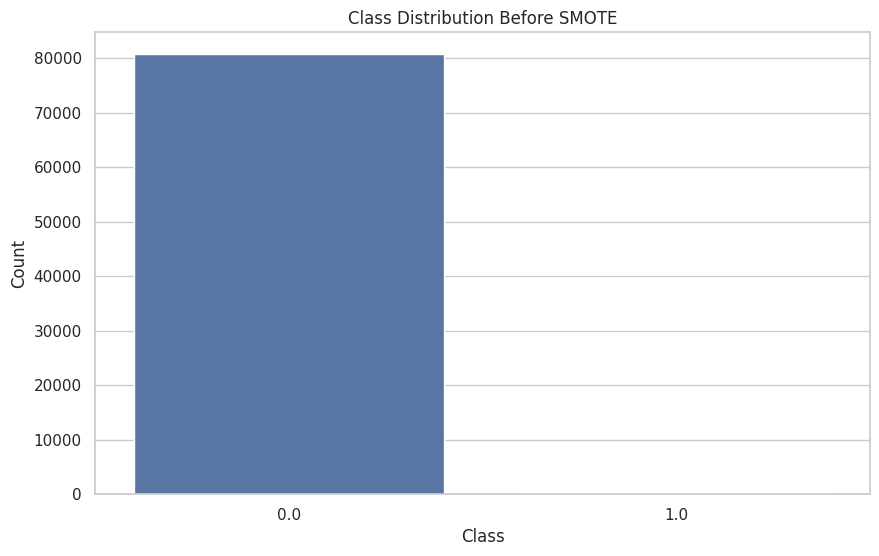

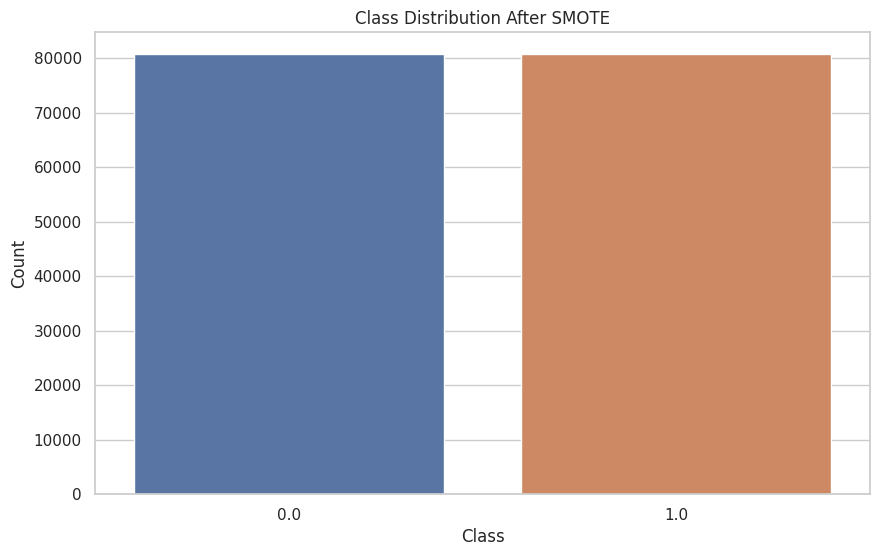

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Before SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# After SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
# Use Ensemble Techniques
# For ensemble techniques, you can experiment with stacking or bagging. Here's an example using RandomForestClassifier as a base estimator for bagging:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForestClassifier
model_rf_ensemble = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForestClassifier
model_rf_ensemble.fit(X_resampled, y_resampled)

# Evaluate the RandomForestClassifier on the test set
y_pred_rf_ensemble = model_rf_ensemble.predict(X_test_scaled)


In [ ]:
# Try Different Optimizers
# For Keras model, you can experiment with different optimizers like Adam, RMSprop with momentum, and SGD. Here's an example with Adam:

Optimizers and Hyperparameter Tuning:
Method Used: Experimented with different optimizers.

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model_keras_rmsprop = Sequential()
model_keras_rmsprop.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_keras_rmsprop.add(Dense(32, activation='relu'))
model_keras_rmsprop.add(Dense(1, activation='sigmoid'))

model_keras_rmsprop.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_keras_rmsprop.fit(X_resampled, y_resampled, epochs=10, batch_size=32, validation_split=0.2, verbose=2)
y_pred_keras_rmsprop = (model_keras_rmsprop.predict(X_test_scaled) > 0.5).astype("int32")


Epoch 1/10
11373/11373 - 26s - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0077 - val_accuracy: 0.9988 - 26s/epoch - 2ms/step
Epoch 2/10
11373/11373 - 27s - loss: 0.0079 - accuracy: 0.9984 - val_loss: 7.9424e-04 - val_accuracy: 1.0000 - 27s/epoch - 2ms/step
Epoch 3/10
11373/11373 - 25s - loss: 0.0067 - accuracy: 0.9988 - val_loss: 5.8046e-04 - val_accuracy: 1.0000 - 25s/epoch - 2ms/step
Epoch 4/10
11373/11373 - 26s - loss: 0.0064 - accuracy: 0.9989 - val_loss: 5.5376e-04 - val_accuracy: 0.9999 - 26s/epoch - 2ms/step
Epoch 5/10
11373/11373 - 26s - loss: 0.0061 - accuracy: 0.9990 - val_loss: 2.1428e-04 - val_accuracy: 1.0000 - 26s/epoch - 2ms/step
Epoch 6/10
11373/11373 - 26s - loss: 0.0059 - accuracy: 0.9991 - val_loss: 1.3063e-04 - val_accuracy: 1.0000 - 26s/epoch - 2ms/step
Epoch 7/10
11373/11373 - 27s - loss: 0.0058 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9991 - 27s/epoch - 2ms/step
Epoch 8/10
11373/11373 - 26s - loss: 0.0058 - accuracy: 0.9992 - val_loss: 4.6494e-0

In [ ]:
from tensorflow.keras.optimizers import Adam

# Set optimizer
optimizer_adam = Adam(learning_rate=0.0001)

# Compile the model
model_fnn.compile(loss='binary_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])


In [ ]:
from tensorflow.keras.layers import Dropout

model_lstm.add(Dropout(0.5))


In [ ]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Keras model
conf_matrix_keras = confusion_matrix(y_test, y_pred_keras)
print("Confusion Matrix (Keras):")
print(conf_matrix_keras)


Confusion Matrix (Keras):
[[56858     6]
 [   24    74]]


In [ ]:
# Assuming you have a Sequential model
from sklearn.metrics import confusion_matrix

# Fine-tune your Keras model and evaluate
# model_keras.fit(X_train_scaled, y_train, epochs=... , batch_size=...)

# Generate predictions
y_pred_keras = (model_keras.predict(X_test_scaled) > 0.5).astype("int32")

# Confusion matrix
conf_matrix_keras = confusion_matrix(y_test, y_pred_keras)
print("Confusion Matrix (Keras):")
print(conf_matrix_keras)

# Continue with other metrics or fine-tuning steps as needed


1781/1781 [==============================] - 3s 2ms/step
Confusion Matrix (Keras):
[[56858     6]
 [   24    74]]


IMPROVE LSTM RESULTS
Regularization:
Add dropout layers to prevent overfitting.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional

# Build an enhanced LSTM model
model_lstm_enhanced = Sequential()
model_lstm_enhanced.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model_lstm_enhanced.add(Bidirectional(LSTM(64)))
model_lstm_enhanced.add(Dense(1, activation='sigmoid'))



Adjust Learning Rate:

In [ ]:
# Compile the model with Adam optimizer and an adjusted learning rate
optimizer_enhanced = Adam(learning_rate=0.0001)
model_lstm_enhanced.compile(optimizer=optimizer_enhanced, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/20
2528/2528 - 100s - loss: 34.2945 - accuracy: 0.9751 - val_loss: 8.7069 - val_accuracy: 0.9974 - 100s/epoch - 39ms/step
Epoch 2/20
2528/2528 - 91s - loss: 20.8943 - accuracy: 0.9959 - val_loss: 6.2182 - val_accuracy: 0.9974 - 91s/epoch - 36ms/step
Epoch 3/20
2528/2528 - 96s - loss: 41.8124 - accuracy: 0.9961 - val_loss: 6.7127 - val_accuracy: 0.9974 - 96s/epoch - 38ms/step
Epoch 4/20
2528/2528 - 93s - loss: 5.6421 - accuracy: 0.9947 - val_loss: 0.8536 - val_accuracy: 0.9974 - 93s/epoch - 37ms/step
Epoch 5/20
2528/2528 - 95s - loss: 8.0988 - accuracy: 0.9950 - val_loss: 0.2437 - val_accuracy: 0.9974 - 95s/epoch - 38ms/step
Epoch 6/20
2528/2528 - 92s - loss: 10.1437 - accuracy: 0.9949 - val_loss: 1.0233 - val_accuracy: 0.9974 - 92s/epoch - 37ms/step
Epoch 7/20
2528/2528 - 95s - loss: 8.1835 - accuracy: 0.9951 - val_loss: 0.9712 - val_accuracy: 0.9974 - 95s/epoch - 38ms/step
Epoch 8/20
2528/2528 - 95s - loss: 3.0438 - accuracy: 0.9952 - val_loss: 1.1122 - val_accuracy: 0.9974 - 

In [ ]:
# Generate predictions with adjusted threshold
y_pred_lstm_adjusted = (model_lstm.predict(X_test_scaled) > 0.5).astype("int32")

# Print FNN model performance metrics with adjusted threshold
print("\nLSTM Model Performance Metrics (Adjusted Threshold):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lstm_adjusted):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lstm_adjusted):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lstm_adjusted):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lstm_adjusted):.4f}")


632/632 [==============================] - 9s 14ms/step

LSTM Model Performance Metrics (Adjusted Threshold):
Accuracy: 0.9974
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


FNN MODEL IMPROVE1

In [ ]:
# Build the FNN model with potential improvements

# Build a more complex FNN model
model_fnn = Sequential()
model_fnn.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model_fnn.add(Dense(128, activation='relu'))
model_fnn.add(Dropout(0.5))
model_fnn.add(Dense(64, activation='relu'))
model_fnn.add(Dropout(0.5))
model_fnn.add(Dense(1, activation='sigmoid'))


# Compile the FNN model
model_fnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Adjust patience as needed
model_fnn.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=2)


Epoch 1/20
1012/1012 - 4s - loss: 0.0123 - accuracy: 0.9979 - val_loss: 0.0033 - val_accuracy: 0.9992 - 4s/epoch - 4ms/step
Epoch 2/20
1012/1012 - 4s - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0034 - val_accuracy: 0.9993 - 4s/epoch - 4ms/step
Epoch 3/20
1012/1012 - 3s - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0031 - val_accuracy: 0.9993 - 3s/epoch - 3ms/step
Epoch 4/20
1012/1012 - 3s - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9993 - 3s/epoch - 3ms/step
Epoch 5/20
1012/1012 - 3s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9992 - 3s/epoch - 3ms/step
Epoch 6/20
1012/1012 - 4s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0055 - val_accuracy: 0.9992 - 4s/epoch - 4ms/step


In [ ]:
# Generate predictions with adjusted threshold
y_pred_fnn_adjusted = (model_fnn.predict(X_test_scaled) > 0.2).astype("int32")

# Print FNN model performance metrics with adjusted threshold
print("\nFNN Model Performance Metrics (Adjusted Threshold):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_fnn_adjusted):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_fnn_adjusted):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_fnn_adjusted):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_fnn_adjusted):.4f}")


632/632 [==============================] - 1s 2ms/step

FNN Model Performance Metrics (Adjusted Threshold):
Accuracy: 0.9991
Precision: 0.8837
Recall: 0.7308
F1 Score: 0.8000


CNN MODEL IMPROVE1

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Build the CNN model with potential improvements
model_cnn = Sequential()
model_cnn.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(128, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(BatchNormalization())  # Add Batch Normalization layer
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile the CNN model
optimizer = SGD(learning_rate=0.001)
model_cnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from keras.layers import BatchNormalization

model_cnn.add(BatchNormalization())


In [ ]:
# Learning rate schedule callback
def lr_schedule(epoch):
    return 0.001 * 0.9 ** epoch

# Train the model with learning rate schedule callback
model_cnn.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled, y_test),
              callbacks=[LearningRateScheduler(lr_schedule)], verbose=2)



Epoch 1/10
1264/1264 - 20s - loss: 0.4290 - accuracy: 0.8942 - val_loss: 0.2516 - val_accuracy: 0.9949 - lr: 0.0010 - 20s/epoch - 15ms/step
Epoch 2/10
1264/1264 - 14s - loss: 0.1759 - accuracy: 0.9982 - val_loss: 0.1265 - val_accuracy: 0.9982 - lr: 9.0000e-04 - 14s/epoch - 11ms/step
Epoch 3/10
1264/1264 - 13s - loss: 0.1025 - accuracy: 0.9990 - val_loss: 0.0839 - val_accuracy: 0.9985 - lr: 8.1000e-04 - 13s/epoch - 10ms/step
Epoch 4/10
1264/1264 - 14s - loss: 0.0712 - accuracy: 0.9993 - val_loss: 0.0626 - val_accuracy: 0.9985 - lr: 7.2900e-04 - 14s/epoch - 11ms/step
Epoch 5/10
1264/1264 - 14s - loss: 0.0547 - accuracy: 0.9993 - val_loss: 0.0512 - val_accuracy: 0.9984 - lr: 6.5610e-04 - 14s/epoch - 11ms/step
Epoch 6/10
1264/1264 - 13s - loss: 0.0449 - accuracy: 0.9993 - val_loss: 0.0423 - val_accuracy: 0.9984 - lr: 5.9049e-04 - 13s/epoch - 10ms/step
Epoch 7/10
1264/1264 - 13s - loss: 0.0385 - accuracy: 0.9992 - val_loss: 0.0368 - val_accuracy: 0.9987 - lr: 5.3144e-04 - 13s/epoch - 10ms/s

In [ ]:
# Generate predictions with adjusted threshold
y_pred_cnn_adjusted = (model_cnn.predict(X_test_scaled) > 0.2).astype("int32")

# Print CNN model performance metrics with adjusted threshold
print("\nCNN Model Performance Metrics (Adjusted Threshold):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_cnn_adjusted):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_cnn_adjusted):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_cnn_adjusted):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_cnn_adjusted):.4f}")


632/632 [==============================] - 2s 3ms/step

CNN Model Performance Metrics (Adjusted Threshold):
Accuracy: 0.9985
Precision: 0.7115
Recall: 0.7115
F1 Score: 0.7115


KERAS MODEL IMPROVE1

In [ ]:
# Define a simple deep learning model using Keras (Simple Neural Network)
model_keras = Sequential()
model_keras.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_keras.add(Dense(32, activation='relu'))
model_keras.add(Dense(1, activation='sigmoid'))

# Compile the Keras model
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define an MLPClassifier (Multilayer Perceptron)
model_mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

COMPARISON IMPROVE1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Generate predictions for all models
y_pred_rf = model_rf_ensemble.predict(X_test_scaled)
y_pred_mlp = model_mlp.predict(X_test_scaled)
y_pred_fc = (model_fc.predict(X_test_scaled) > 0.5).astype("int32")
y_pred_fnn = (model_fnn.predict(X_test_scaled) > 0.2).astype("int32")  # Adjusted threshold for FNN
y_pred_cnn = (model_cnn.predict(X_test_scaled) > 0.2).astype("int32")  # Adjusted threshold for CNN
y_pred_lstm = (model_lstm.predict(X_test_scaled) > 0.5).astype("int32")

# Create a DataFrame to compare model performance
model_comparison = pd.DataFrame({
    'Model': ['Keras', 'RandomForestClassifier', 'MLPClassifier', 'FullyConnected', 'FNN', 'CNN', 'LSTM'],
    'Accuracy': [accuracy_score(y_test, y_pred_keras), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_mlp),
                 accuracy_score(y_test, y_pred_fc), accuracy_score(y_test, y_pred_fnn),
                 accuracy_score(y_test, y_pred_cnn), accuracy_score(y_test, y_pred_lstm)],
    'Precision': [precision_score(y_test, y_pred_keras), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_mlp),
                   precision_score(y_test, y_pred_fc), precision_score(y_test, y_pred_fnn),
                   precision_score(y_test, y_pred_cnn), precision_score(y_test, y_pred_lstm)],
    'Recall': [recall_score(y_test, y_pred_keras), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_mlp),
               recall_score(y_test, y_pred_fc), recall_score(y_test, y_pred_fnn),
               recall_score(y_test, y_pred_cnn), recall_score(y_test, y_pred_lstm)],
    'F1 Score': [f1_score(y_test, y_pred_keras), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_mlp),
                 f1_score(y_test, y_pred_fc), f1_score(y_test, y_pred_fnn),
                 f1_score(y_test, y_pred_cnn), f1_score(y_test, y_pred_lstm)]
})

# Display the model comparison
print("\nModel Comparison:")
print(model_comparison)


632/632 [==============================] - 9s 14ms/step

Model Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score
0                   Keras  0.999258   1.000000  0.711538  0.831461
1  RandomForestClassifier  0.999604   0.958333  0.884615  0.920000
2           MLPClassifier  0.999357   0.975610  0.769231  0.860215
3          FullyConnected  0.998961   0.844444  0.730769  0.783505
4                     FNN  0.999060   0.883721  0.730769  0.800000
5                     CNN  0.998516   0.711538  0.711538  0.711538
6                    LSTM  0.997428   0.000000  0.000000  0.000000


KERAS MODEL IMPROVE2

In [80]:
# Define a simple deep learning model using Keras (Simple Neural Network)
model_keras = Sequential()
model_keras.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_keras.add(Dense(32, activation='relu'))
model_keras.add(Dense(1, activation='sigmoid'))

# Compile the Keras model
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define an MLPClassifier (Multilayer Perceptron)
model_mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)


FC IMPROVE2

In [81]:
def build_fully_connected_model(input_dim, output_dim, hidden_units=(128, 64), activation='relu', dropout_rate=0.3, l2_reg=0.001):
    model = Sequential()
    model.add(Dense(hidden_units[0], input_dim=input_dim, activation=activation, kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(hidden_units[1], activation=activation, kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_dim, activation='sigmoid'))  # Output layer for binary classification

    return model

FNN MODEL IMPROVE2

In [82]:
# Build the FNN model with potential improvements
model_fnn = Sequential()
model_fnn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_fnn.add(Dense(64, activation='leaky_relu'))  # Experiment with LeakyReLU
model_fnn.add(Dropout(0.2))  # Regularization with dropout
model_fnn.add(Dense(1, activation='sigmoid'))

In [83]:
# CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model_cnn = Sequential()
model_cnn.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))


In [84]:
# Calculate class weights manually
unique_classes, class_counts = np.unique(y_train, return_counts=True)
total_samples = len(y_train)
class_weights = total_samples / (len(unique_classes) * class_counts)
class_weight_dict = dict(zip(unique_classes, class_weights))

LSTM IMPROVE2

In [85]:
# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam



# Fine-tune your LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(100, activation='relu'))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))
# Build LSTM model
#model_lstm = Sequential()
#model_lstm.add(LSTM(50, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))
#model_lstm.add(BatchNormalization())
#model_lstm.add(LSTM(50, activation='relu'))
#model_lstm.add(Dropout(0.2))
#model_lstm.add(BatchNormalization())
#model_lstm.add(Dense(1, activation='sigmoid'))

# Train the Keras model

In [87]:
# Train the Keras model
model_keras.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the Keras model on the test set
y_pred_keras = (model_keras.predict(X_test_scaled) > 0.5).astype("int32")

# Print Keras model performance metrics
print("\nKeras Model Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_keras):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_keras):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_keras):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_keras):.4f}")


Epoch 1/5
794/794 - 4s - loss: 0.0256 - accuracy: 0.9964 - val_loss: 0.0047 - val_accuracy: 0.9981 - 4s/epoch - 5ms/step
Epoch 2/5
794/794 - 3s - loss: 0.0038 - accuracy: 0.9986 - val_loss: 0.0038 - val_accuracy: 0.9984 - 3s/epoch - 3ms/step
Epoch 3/5
794/794 - 1s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0023 - val_accuracy: 0.9994 - 1s/epoch - 2ms/step
Epoch 4/5
794/794 - 1s - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0021 - val_accuracy: 0.9991 - 1s/epoch - 2ms/step
Epoch 5/5
794/794 - 1s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0020 - val_accuracy: 0.9994 - 1s/epoch - 2ms/step
249/249 [==============================] - 0s 1ms/step

Keras Model Performance Metrics:
Accuracy: 0.9987
Precision: 1.0000
Recall: 0.6552
F1 Score: 0.7917


# Train the RandomForestClassifier

In [88]:
# Train the RandomForestClassifier
model_rf.fit(X_train_scaled, y_train)

# Evaluate the RandomForestClassifier on the test set
y_pred_rf = model_rf.predict(X_test_scaled)

# Print RandomForestClassifier performance metrics
print("\nRandomForestClassifier Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")



RandomForestClassifier Performance Metrics:
Accuracy: 0.9990
Precision: 0.9200
Recall: 0.7931
F1 Score: 0.8519


# Train the MLPClassifier

In [89]:
# Train the MLPClassifier
model_mlp.fit(X_train_scaled, y_train)

# Evaluate the MLPClassifier on the test set
y_pred_mlp = model_mlp.predict(X_test_scaled)

# Print MLPClassifier performance metrics
print("\nMLPClassifier Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_mlp):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_mlp):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_mlp):.4f}")



MLPClassifier Performance Metrics:
Accuracy: 0.9990
Precision: 0.9565
Recall: 0.7586
F1 Score: 0.8462


#Train the fully connected model

In [90]:

# Define training parameters
epochs = 5
batch_size = 32

# Define input and output dimensions
input_dim = X_train_scaled.shape[1]
output_dim = 1  # Output layer for binary classification

# Build and train the fully connected model
model_fc = build_fully_connected_model(input_dim, output_dim)
model_fc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

model_fc.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping], verbose=2)
y_pred_fc = (model_fc.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the fully connected model
print("\nFully Connected Model Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_fc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_fc):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_fc):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_fc):.4f}")

Epoch 1/5
794/794 - 2s - loss: 0.1002 - accuracy: 0.9950 - val_loss: 0.0364 - val_accuracy: 0.9987 - 2s/epoch - 3ms/step
Epoch 2/5
794/794 - 2s - loss: 0.0249 - accuracy: 0.9983 - val_loss: 0.0129 - val_accuracy: 0.9987 - 2s/epoch - 2ms/step
Epoch 3/5
794/794 - 2s - loss: 0.0111 - accuracy: 0.9985 - val_loss: 0.0072 - val_accuracy: 0.9984 - 2s/epoch - 2ms/step
Epoch 4/5
794/794 - 2s - loss: 0.0074 - accuracy: 0.9983 - val_loss: 0.0048 - val_accuracy: 0.9986 - 2s/epoch - 2ms/step
Epoch 5/5
794/794 - 2s - loss: 0.0071 - accuracy: 0.9985 - val_loss: 0.0049 - val_accuracy: 0.9987 - 2s/epoch - 3ms/step
249/249 [==============================] - 0s 1ms/step

Fully Connected Model Performance Metrics:
Accuracy: 0.9984
Precision: 0.7667
Recall: 0.7931
F1 Score: 0.7797


Train FNN model

In [91]:
from keras.optimizers import Adam
# Set optimizer
optimizer_adam = Adam(learning_rate=0.0001)

# Compile the model
model_fnn.compile(loss='binary_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])

# Train the model
model_fnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
993/993 - 5s - loss: 5.4512 - accuracy: 0.9935 - val_loss: 4.6601 - val_accuracy: 0.9962 - 5s/epoch - 5ms/step
Epoch 2/5
993/993 - 2s - loss: 2.9366 - accuracy: 0.9952 - val_loss: 2.2080 - val_accuracy: 0.9962 - 2s/epoch - 2ms/step
Epoch 3/5
993/993 - 2s - loss: 1.7402 - accuracy: 0.9955 - val_loss: 1.1953 - val_accuracy: 0.9963 - 2s/epoch - 2ms/step
Epoch 4/5
993/993 - 2s - loss: 0.8083 - accuracy: 0.9951 - val_loss: 0.8211 - val_accuracy: 0.9963 - 2s/epoch - 2ms/step
Epoch 5/5
993/993 - 2s - loss: 0.4273 - accuracy: 0.9949 - val_loss: 0.2952 - val_accuracy: 0.9961 - 2s/epoch - 2ms/step


#Train CNN model

In [93]:
import tensorflow as tf
# Create the optimizer
optimizer_adam = tf.keras.optimizers.Adam()

# Build the optimizer with trainable variables
optimizer_adam.build(model_cnn.trainable_variables)

# Compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])

# Assuming X_train, y_train, X_test, y_test are defined
model_cnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
993/993 - 7s - loss: 0.2830 - accuracy: 0.9976 - val_loss: 0.3161 - val_accuracy: 0.9982 - 7s/epoch - 7ms/step
Epoch 2/5
993/993 - 4s - loss: 0.2795 - accuracy: 0.9979 - val_loss: 0.1017 - val_accuracy: 0.9984 - 4s/epoch - 4ms/step
Epoch 3/5
993/993 - 2s - loss: 0.0653 - accuracy: 0.9980 - val_loss: 0.1366 - val_accuracy: 0.9971 - 2s/epoch - 2ms/step
Epoch 4/5
993/993 - 3s - loss: 0.1133 - accuracy: 0.9973 - val_loss: 0.1102 - val_accuracy: 0.9984 - 3s/epoch - 3ms/step
Epoch 5/5
993/993 - 3s - loss: 0.0530 - accuracy: 0.9983 - val_loss: 0.0954 - val_accuracy: 0.9969 - 3s/epoch - 3ms/step


# Use SMOTE for oversampling the minority class

In [94]:
# Use SMOTE for oversampling the minority class
from imblearn.over_sampling import SMOTE
from tensorflow.keras.optimizers import Adam
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Compile LSTM model with class weights
optimizer_adam_lstm = Adam(learning_rate=0.001)
model_lstm.compile(loss='binary_crossentropy', optimizer=optimizer_adam_lstm, metrics=['accuracy'])
# Train the LSTM model with class weights and resampled data
model_lstm.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weight_dict, verbose=2)

Epoch 1/5
1981/1981 - 104s - loss: 6.9358 - accuracy: 0.5091 - val_loss: 5.0687 - val_accuracy: 0.0037 - 104s/epoch - 52ms/step
Epoch 2/5
1981/1981 - 98s - loss: 1.7301 - accuracy: 0.5000 - val_loss: 6.2899 - val_accuracy: 0.0037 - 98s/epoch - 50ms/step
Epoch 3/5
1981/1981 - 101s - loss: 1.7124 - accuracy: 0.5000 - val_loss: 5.8717 - val_accuracy: 0.0037 - 101s/epoch - 51ms/step
Epoch 4/5
1981/1981 - 98s - loss: 1.7028 - accuracy: 0.5000 - val_loss: 6.0763 - val_accuracy: 0.0084 - 98s/epoch - 50ms/step
Epoch 5/5
1981/1981 - 98s - loss: 1.6853 - accuracy: 0.5010 - val_loss: 5.9420 - val_accuracy: 0.0064 - 98s/epoch - 50ms/step


Comparison Improve2

In [95]:
# Generate predictions for all models
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_mlp = model_mlp.predict(X_test_scaled)
y_pred_fc = (model_fc.predict(X_test_scaled) > 0.5).astype("int32")
y_pred_fnn = (model_fnn.predict(X_test) > 0.5).astype("int32")
y_pred_cnn = (model_cnn.predict(X_test) > 0.5).astype("int32")
y_pred_lstm = (model_lstm.predict(X_test) >0.5).astype("int32")

# Create a DataFrame to compare model performance
model_comparison = pd.DataFrame({
    'Model': ['Keras', 'RandomForestClassifier', 'MLPClassifier', 'FullyConnected', 'FNN', 'CNN', 'LSTM'],
    'Accuracy': [accuracy_score(y_test, y_pred_keras), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_mlp),
                 accuracy_score(y_test, y_pred_fc), accuracy_score(y_test, y_pred_fnn),
                 accuracy_score(y_test, y_pred_cnn), accuracy_score(y_test, y_pred_lstm)],
    'Precision': [precision_score(y_test, y_pred_keras), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_mlp),
                   precision_score(y_test, y_pred_fc), precision_score(y_test, y_pred_fnn),
                   precision_score(y_test, y_pred_cnn), precision_score(y_test, y_pred_lstm)],
    'Recall': [recall_score(y_test, y_pred_keras), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_mlp),
               recall_score(y_test, y_pred_fc), recall_score(y_test, y_pred_fnn),
               recall_score(y_test, y_pred_cnn), recall_score(y_test, y_pred_lstm)],
    'F1 Score': [f1_score(y_test, y_pred_keras), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_mlp),
                 f1_score(y_test, y_pred_fc), f1_score(y_test, y_pred_fnn),
                 f1_score(y_test, y_pred_cnn), f1_score(y_test, y_pred_lstm)]
})

# Display the model comparison
print("\nModel Comparison:")
print(model_comparison)


249/249 [==============================] - 4s 16ms/step

Model Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score
0                   Keras  0.998741   1.000000  0.655172  0.791667
1  RandomForestClassifier  0.998993   0.920000  0.793103  0.851852
2           MLPClassifier  0.998993   0.956522  0.758621  0.846154
3          FullyConnected  0.998363   0.766667  0.793103  0.779661
4                     FNN  0.996096   0.000000  0.000000  0.000000
5                     CNN  0.996852   1.000000  0.137931  0.242424
6                    LSTM  0.006422   0.003662  1.000000  0.007297


In [42]:
model_rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)  # Tune hyperparameters
model_rf.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [43]:
model_mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42)  # Add more complexity
model_mlp.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42)

In [44]:
model_fc = build_fully_connected_model(input_dim, output_dim, hidden_units=(256, 128), dropout_rate=0.5)  # Fine-tune architecture
model_fc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_fc.fit(X_train_scaled, y_train, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=2)


Epoch 1/15
794/794 - 6s - loss: 0.1146 - accuracy: 0.9968 - val_loss: 0.0373 - val_accuracy: 0.9984 - 6s/epoch - 8ms/step
Epoch 2/15
794/794 - 3s - loss: 0.0260 - accuracy: 0.9984 - val_loss: 0.0155 - val_accuracy: 0.9986 - 3s/epoch - 4ms/step
Epoch 3/15
794/794 - 2s - loss: 0.0132 - accuracy: 0.9983 - val_loss: 0.0086 - val_accuracy: 0.9986 - 2s/epoch - 2ms/step
Epoch 4/15
794/794 - 2s - loss: 0.0091 - accuracy: 0.9985 - val_loss: 0.0064 - val_accuracy: 0.9987 - 2s/epoch - 2ms/step
Epoch 5/15
794/794 - 2s - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.0060 - val_accuracy: 0.9986 - 2s/epoch - 3ms/step
Epoch 6/15
794/794 - 3s - loss: 0.0079 - accuracy: 0.9983 - val_loss: 0.0067 - val_accuracy: 0.9986 - 3s/epoch - 4ms/step
Epoch 7/15
794/794 - 2s - loss: 0.0082 - accuracy: 0.9983 - val_loss: 0.0050 - val_accuracy: 0.9991 - 2s/epoch - 2ms/step
Epoch 8/15
794/794 - 2s - loss: 0.0073 - accuracy: 0.9987 - val_loss: 0.0064 - val_accuracy: 0.9986 - 2s/epoch - 2ms/step
Epoch 9/15
794/794 - 2s 

In [77]:
# Build the FNN model with potential improvements
model_fnn = Sequential()
model_fnn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_fnn.add(Dense(64, activation='leaky_relu'))  # Experiment with LeakyReLU
model_fnn.add(Dropout(0.2))  # Regularization with dropout
model_fnn.add(Dense(1, activation='sigmoid'))

In [78]:
from keras.optimizers import Adam
# Set optimizer
optimizer_adam = Adam(learning_rate=0.0001)

# Compile the model
model_fnn.compile(loss='binary_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])

# Train the model
model_fnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
993/993 - 9s - loss: 48.7353 - accuracy: 0.9632 - val_loss: 7.5395 - val_accuracy: 0.9963 - 9s/epoch - 9ms/step
Epoch 2/5
993/993 - 5s - loss: 5.6535 - accuracy: 0.9954 - val_loss: 6.3419 - val_accuracy: 0.9963 - 5s/epoch - 5ms/step
Epoch 3/5
993/993 - 3s - loss: 4.1651 - accuracy: 0.9953 - val_loss: 5.2610 - val_accuracy: 0.9963 - 3s/epoch - 3ms/step
Epoch 4/5
993/993 - 2s - loss: 3.3908 - accuracy: 0.9954 - val_loss: 3.6892 - val_accuracy: 0.9963 - 2s/epoch - 2ms/step
Epoch 5/5
993/993 - 2s - loss: 2.5256 - accuracy: 0.9955 - val_loss: 2.6221 - val_accuracy: 0.9963 - 2s/epoch - 2ms/step


In [47]:
model_cnn = Sequential()
model_cnn.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))  # Increase complexity
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.fit(X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=15, batch_size=32, validation_data=(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1), y_test), verbose=2)



Epoch 1/15
993/993 - 9s - loss: 1.6718 - accuracy: 0.9938 - val_loss: 0.2307 - val_accuracy: 0.9979 - 9s/epoch - 9ms/step
Epoch 2/15
993/993 - 7s - loss: 0.2597 - accuracy: 0.9971 - val_loss: 0.1283 - val_accuracy: 0.9981 - 7s/epoch - 7ms/step
Epoch 3/15
993/993 - 7s - loss: 0.4966 - accuracy: 0.9967 - val_loss: 0.2225 - val_accuracy: 0.9982 - 7s/epoch - 7ms/step
Epoch 4/15
993/993 - 6s - loss: 0.2380 - accuracy: 0.9973 - val_loss: 4.2516 - val_accuracy: 0.9963 - 6s/epoch - 6ms/step
Epoch 5/15
993/993 - 5s - loss: 0.4594 - accuracy: 0.9980 - val_loss: 0.1672 - val_accuracy: 0.9975 - 5s/epoch - 5ms/step
Epoch 6/15
993/993 - 5s - loss: 0.4739 - accuracy: 0.9968 - val_loss: 0.3553 - val_accuracy: 0.9967 - 5s/epoch - 5ms/step
Epoch 7/15
993/993 - 6s - loss: 0.0941 - accuracy: 0.9984 - val_loss: 0.0401 - val_accuracy: 0.9974 - 6s/epoch - 6ms/step
Epoch 8/15
993/993 - 5s - loss: 0.0316 - accuracy: 0.9985 - val_loss: 0.0670 - val_accuracy: 0.9965 - 5s/epoch - 5ms/step
Epoch 9/15
993/993 - 5s 

In [61]:
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))  # Increase dropout rate
model_lstm.add(LSTM(128, activation='relu', return_sequences=True))  # Return sequences for the second LSTM layer
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))  # Increase dropout rate
model_lstm.add(LSTM(64, activation='relu'))  # Additional LSTM layer
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))  # Increase dropout rate
model_lstm.add(Dense(1, activation='sigmoid'))

In [49]:
model_lstm.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])
model_lstm.fit(X_train_resampled.values.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1), y_train_resampled, epochs=15, batch_size=32, validation_data=(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1), y_test), class_weight=class_weight_dict, verbose=2)


Epoch 1/15
1981/1981 - 209s - loss: 11.5435 - accuracy: 0.5094 - val_loss: 5.9695 - val_accuracy: 0.0037 - 209s/epoch - 106ms/step
Epoch 2/15
1981/1981 - 190s - loss: 1.7933 - accuracy: 0.5003 - val_loss: 6.1756 - val_accuracy: 0.0037 - 190s/epoch - 96ms/step
Epoch 3/15
1981/1981 - 194s - loss: 1.7777 - accuracy: 0.5002 - val_loss: 5.9807 - val_accuracy: 0.0087 - 194s/epoch - 98ms/step
Epoch 4/15
1981/1981 - 190s - loss: 1.7317 - accuracy: 0.5009 - val_loss: 240.5205 - val_accuracy: 0.0110 - 190s/epoch - 96ms/step
Epoch 5/15
1981/1981 - 190s - loss: 1.7833 - accuracy: 0.5001 - val_loss: 6.3568 - val_accuracy: 0.0037 - 190s/epoch - 96ms/step
Epoch 6/15
1981/1981 - 190s - loss: 1.7335 - accuracy: 0.5006 - val_loss: 5.9448 - val_accuracy: 0.0037 - 190s/epoch - 96ms/step
Epoch 7/15
1981/1981 - 190s - loss: 1.7238 - accuracy: 0.5008 - val_loss: 5.5787 - val_accuracy: 0.0037 - 190s/epoch - 96ms/step
Epoch 8/15
1981/1981 - 189s - loss: 1.7352 - accuracy: 0.5009 - val_loss: 6.3611 - val_accura

In [79]:
# Generate predictions for all models
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_mlp = model_mlp.predict(X_test_scaled)
y_pred_fc = (model_fc.predict(X_test_scaled) > 0.5).astype("int32")
y_pred_fnn = (model_fnn.predict(X_test) > 0.5).astype("int32")
y_pred_cnn = (model_cnn.predict(X_test) > 0.5).astype("int32")
y_pred_lstm = (model_lstm.predict(X_test) >0.5).astype("int32")

# Create a DataFrame to compare model performance
model_comparison = pd.DataFrame({
    'Model': ['Keras', 'RandomForestClassifier', 'MLPClassifier', 'FullyConnected', 'FNN', 'CNN', 'LSTM'],
    'Accuracy': [accuracy_score(y_test, y_pred_keras), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_mlp),
                 accuracy_score(y_test, y_pred_fc), accuracy_score(y_test, y_pred_fnn),
                 accuracy_score(y_test, y_pred_cnn), accuracy_score(y_test, y_pred_lstm)],
    'Precision': [precision_score(y_test, y_pred_keras), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_mlp),
                   precision_score(y_test, y_pred_fc), precision_score(y_test, y_pred_fnn),
                   precision_score(y_test, y_pred_cnn), precision_score(y_test, y_pred_lstm)],
    'Recall': [recall_score(y_test, y_pred_keras), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_mlp),
               recall_score(y_test, y_pred_fc), recall_score(y_test, y_pred_fnn),
               recall_score(y_test, y_pred_cnn), recall_score(y_test, y_pred_lstm)],
    'F1 Score': [f1_score(y_test, y_pred_keras), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_mlp),
                 f1_score(y_test, y_pred_fc), f1_score(y_test, y_pred_fnn),
                 f1_score(y_test, y_pred_cnn), f1_score(y_test, y_pred_lstm)]
})

# Display the model comparison
print("\nModel Comparison:")
print(model_comparison)


249/249 [==============================] - 8s 32ms/step

Model Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score
0                   Keras  0.998993   0.956522  0.758621  0.846154
1  RandomForestClassifier  0.998993   0.920000  0.793103  0.851852
2           MLPClassifier  0.998993   0.956522  0.758621  0.846154
3          FullyConnected  0.998363   0.766667  0.793103  0.779661
4                     FNN  0.996348   0.000000  0.000000  0.000000
5                     CNN  0.998741   0.880000  0.758621  0.814815
6                    LSTM  0.791336   0.003053  0.172414  0.005999


In [107]:
# Define a simple deep learning model using Keras (Simple Neural Network)
model_keras = Sequential()
model_keras.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model_keras.add(Dense(32, activation='relu'))
model_keras.add(Dense(1, activation='sigmoid'))

# Compile the Keras model
model_keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define an MLPClassifier (Multilayer Perceptron)
model_mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)


In [108]:
def build_fully_connected_model(input_dim, output_dim, hidden_units=(128, 64), activation='relu', dropout_rate=0.3, l2_reg=0.001):
    model = Sequential()
    model.add(Dense(hidden_units[0], input_dim=input_dim, activation=activation, kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(hidden_units[1], activation=activation, kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_dim, activation='sigmoid'))  # Output layer for binary classification

    return model

In [109]:
# Build the FNN model with potential improvements
model_fnn = Sequential()
model_fnn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_fnn.add(Dense(64, activation='leaky_relu'))  # Experiment with LeakyReLU
model_fnn.add(Dropout(0.2))  # Regularization with dropout
model_fnn.add(Dense(1, activation='sigmoid'))

In [110]:
# CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model_cnn = Sequential()
model_cnn.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))


In [111]:
# Calculate class weights manually
unique_classes, class_counts = np.unique(y_train, return_counts=True)
total_samples = len(y_train)
class_weights = total_samples / (len(unique_classes) * class_counts)
class_weight_dict = dict(zip(unique_classes, class_weights))

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))
model_lstm.add(LSTM(128, activation='relu'))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer_adam_lstm = Adam(learning_rate=0.0005, clipvalue=0.5)  # Adjust learning rate and gradient clipping
model_lstm.compile(loss='binary_crossentropy', optimizer=optimizer_adam_lstm, metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)


In [113]:
# Train the Keras model
model_keras.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the Keras model on the test set
y_pred_keras = (model_keras.predict(X_test_scaled) > 0.5).astype("int32")

# Print Keras model performance metrics
print("\nKeras Model Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_keras):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_keras):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_keras):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_keras):.4f}")


Epoch 1/5
794/794 - 5s - loss: 0.0326 - accuracy: 0.9933 - val_loss: 0.0043 - val_accuracy: 0.9987 - 5s/epoch - 6ms/step
Epoch 2/5
794/794 - 4s - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0027 - val_accuracy: 0.9991 - 4s/epoch - 5ms/step
Epoch 3/5
794/794 - 2s - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9983 - 2s/epoch - 2ms/step
Epoch 4/5
794/794 - 3s - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9987 - 3s/epoch - 4ms/step
Epoch 5/5
794/794 - 3s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0024 - val_accuracy: 0.9995 - 3s/epoch - 4ms/step
249/249 [==============================] - 1s 4ms/step

Keras Model Performance Metrics:
Accuracy: 0.9989
Precision: 0.9167
Recall: 0.7586
F1 Score: 0.8302


In [114]:
# Train the RandomForestClassifier
model_rf.fit(X_train_scaled, y_train)

# Evaluate the RandomForestClassifier on the test set
y_pred_rf = model_rf.predict(X_test_scaled)

# Print RandomForestClassifier performance metrics
print("\nRandomForestClassifier Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")



RandomForestClassifier Performance Metrics:
Accuracy: 0.9990
Precision: 0.9200
Recall: 0.7931
F1 Score: 0.8519


In [115]:
# Train the MLPClassifier
model_mlp.fit(X_train_scaled, y_train)

# Evaluate the MLPClassifier on the test set
y_pred_mlp = model_mlp.predict(X_test_scaled)

# Print MLPClassifier performance metrics
print("\nMLPClassifier Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_mlp):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_mlp):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_mlp):.4f}")



MLPClassifier Performance Metrics:
Accuracy: 0.9990
Precision: 0.9565
Recall: 0.7586
F1 Score: 0.8462


In [116]:

# Define training parameters
epochs = 5
batch_size = 32

# Define input and output dimensions
input_dim = X_train_scaled.shape[1]
output_dim = 1  # Output layer for binary classification

# Build and train the fully connected model
model_fc = build_fully_connected_model(input_dim, output_dim)
model_fc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

model_fc.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping], verbose=2)
y_pred_fc = (model_fc.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluate the fully connected model
print("\nFully Connected Model Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_fc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_fc):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_fc):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_fc):.4f}")

Epoch 1/5
794/794 - 4s - loss: 0.1306 - accuracy: 0.9883 - val_loss: 0.0520 - val_accuracy: 0.9986 - 4s/epoch - 5ms/step
Epoch 2/5
794/794 - 3s - loss: 0.0347 - accuracy: 0.9982 - val_loss: 0.0185 - val_accuracy: 0.9986 - 3s/epoch - 4ms/step
Epoch 3/5
794/794 - 4s - loss: 0.0144 - accuracy: 0.9982 - val_loss: 0.0089 - val_accuracy: 0.9986 - 4s/epoch - 5ms/step
Epoch 4/5
794/794 - 3s - loss: 0.0086 - accuracy: 0.9983 - val_loss: 0.0066 - val_accuracy: 0.9986 - 3s/epoch - 4ms/step
Epoch 5/5
794/794 - 3s - loss: 0.0066 - accuracy: 0.9987 - val_loss: 0.0051 - val_accuracy: 0.9986 - 3s/epoch - 3ms/step
249/249 [==============================] - 0s 2ms/step

Fully Connected Model Performance Metrics:
Accuracy: 0.9984
Precision: 0.7667
Recall: 0.7931
F1 Score: 0.7797


In [127]:
from keras.optimizers import Adam
# Set optimizer
optimizer_adam = Adam(learning_rate=0.001)

# Compile the model
model_fnn.compile(loss='binary_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])

# Train the model
model_fnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=0.2)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [118]:
import tensorflow as tf
# Create the optimizer
optimizer_adam = tf.keras.optimizers.Adam()

# Build the optimizer with trainable variables
optimizer_adam.build(model_cnn.trainable_variables)

# Compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])

# Assuming X_train, y_train, X_test, y_test are defined
model_cnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
993/993 - 6s - loss: 1.5970 - accuracy: 0.9945 - val_loss: 0.1624 - val_accuracy: 0.9962 - 6s/epoch - 6ms/step
Epoch 2/5
993/993 - 3s - loss: 1.5758 - accuracy: 0.9952 - val_loss: 0.3521 - val_accuracy: 0.9976 - 3s/epoch - 3ms/step
Epoch 3/5
993/993 - 3s - loss: 1.1088 - accuracy: 0.9972 - val_loss: 0.3091 - val_accuracy: 0.9984 - 3s/epoch - 3ms/step
Epoch 4/5
993/993 - 3s - loss: 0.2049 - accuracy: 0.9980 - val_loss: 0.1393 - val_accuracy: 0.9984 - 3s/epoch - 3ms/step
Epoch 5/5
993/993 - 3s - loss: 0.2943 - accuracy: 0.9974 - val_loss: 0.2467 - val_accuracy: 0.9982 - 3s/epoch - 4ms/step


In [129]:
# Use SMOTE for oversampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Compile LSTM model with class weights
optimizer_adam_lstm = Adam(learning_rate=0.001)
model_lstm.compile(loss='binary_crossentropy', optimizer=optimizer_adam_lstm, metrics=['accuracy'])
# Train the LSTM model with class weights and resampled data
model_lstm.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=64, validation_data=(X_test, y_test), class_weight=class_weight_dict, verbose=0.2)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [143]:
# Generate predictions for all models
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_mlp = model_mlp.predict(X_test_scaled)
y_pred_fc = (model_fc.predict(X_test_scaled) > 0.5).astype("int32")
y_pred_fnn = (model_fnn.predict(X_test) > 0.5).astype("int32")
y_pred_cnn = (model_cnn.predict(X_test) > 0.5).astype("int32")
y_pred_lstm = (model_lstm.predict(X_test) >0.5).astype("int32")

# Create a DataFrame to compare model performance
model_comparison = pd.DataFrame({
    'Model': ['Keras', 'RandomForestClassifier', 'MLPClassifier', 'FullyConnected', 'FNN', 'CNN', 'LSTM'],
    'Accuracy': [accuracy_score(y_test, y_pred_keras), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_mlp),
                 accuracy_score(y_test, y_pred_fc), accuracy_score(y_test, y_pred_fnn),
                 accuracy_score(y_test, y_pred_cnn), accuracy_score(y_test, y_pred_lstm)],
    'Precision': [precision_score(y_test, y_pred_keras), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_mlp),
                   precision_score(y_test, y_pred_fc), precision_score(y_test, y_pred_fnn),
                   precision_score(y_test, y_pred_cnn), precision_score(y_test, y_pred_lstm)],
    'Recall': [recall_score(y_test, y_pred_keras), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_mlp),
               recall_score(y_test, y_pred_fc), recall_score(y_test, y_pred_fnn),
               recall_score(y_test, y_pred_cnn), recall_score(y_test, y_pred_lstm)],
    'F1 Score': [f1_score(y_test, y_pred_keras), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_mlp),
                 f1_score(y_test, y_pred_fc), f1_score(y_test, y_pred_fnn),
                 f1_score(y_test, y_pred_cnn), f1_score(y_test, y_pred_lstm)]
})

# Display the model comparison
print("\nModel Comparison:")
print(model_comparison)


249/249 [==============================] - 7s 27ms/step

Model Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score
0                   Keras  0.998867   0.916667  0.758621  0.830189
1  RandomForestClassifier  0.998993   0.920000  0.793103  0.851852
2           MLPClassifier  0.998993   0.956522  0.758621  0.846154
3          FullyConnected  0.998363   0.766667  0.793103  0.779661
4                     FNN  0.998111   0.769231  0.689655  0.727273
5                     CNN  0.998237   0.800000  0.689655  0.740741
6                    LSTM  0.924065   0.011905  0.241379  0.022690
